In [16]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load dataset
df = pd.read_csv(r"C:\Users\ASUS\Documents\-em-bond-macro-analysis\data\Cleaned\panel_monthly_2010_2024_copy.csv")  # adjust path if needed
india = df[df['country'] == 'India']


In [17]:
# 3. Basic inspection
print(india.head())



          date country  yield_10y  CPI_annual_pct  GDP_growth_annual_pct  \
347  1/31/2010   India      7.591        11.98939               8.497585   
348  2/28/2010   India      7.864        11.98939               8.497585   
349  3/31/2010   India      7.850        11.98939               8.497585   
350  4/30/2010   India      8.061        11.98939               8.497585   
351  5/31/2010   India      7.564        11.98939               8.497585   

     External_debt_usd  usd_index      brent  
347       2.904280e+11  77.840526  77.008421  
348       2.904280e+11  80.155789  74.909999  
349       2.904280e+11  80.671304  79.931304  
350       2.904280e+11  81.232857  85.753810  
351       2.904280e+11  85.361501  76.664737  


In [18]:
print(india.info())


<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 347 to 514
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   168 non-null    object 
 1   country                168 non-null    object 
 2   yield_10y              168 non-null    float64
 3   CPI_annual_pct         168 non-null    float64
 4   GDP_growth_annual_pct  168 non-null    float64
 5   External_debt_usd      168 non-null    float64
 6   usd_index              168 non-null    float64
 7   brent                  168 non-null    float64
dtypes: float64(6), object(2)
memory usage: 11.8+ KB
None


In [19]:
print(india.describe())

        yield_10y  CPI_annual_pct  GDP_growth_annual_pct  External_debt_usd  \
count  168.000000      168.000000             168.000000       1.680000e+02   
mean     7.445196        6.572745               6.219774       4.906833e+11   
std      0.817423        2.529539               3.676579       1.028288e+11   
min      5.837000        3.328173              -5.777725       2.904280e+11   
25%      6.857250        4.906973               5.456388       4.272450e+11   
50%      7.465000        6.136290               7.102806       4.952035e+11   
75%      8.030250        8.911793               8.256306       5.649790e+11   
max      9.044000       11.989390               9.689592       6.467870e+11   

        usd_index       brent  
count  168.000000  168.000000  
mean    91.333500   78.234503  
std      9.116545   24.891654  
min     74.236522   26.631429  
25%     81.419578   57.604318  
50%     93.835486   75.805899  
75%     97.739704  103.660640  
max    111.941428  124.544546  


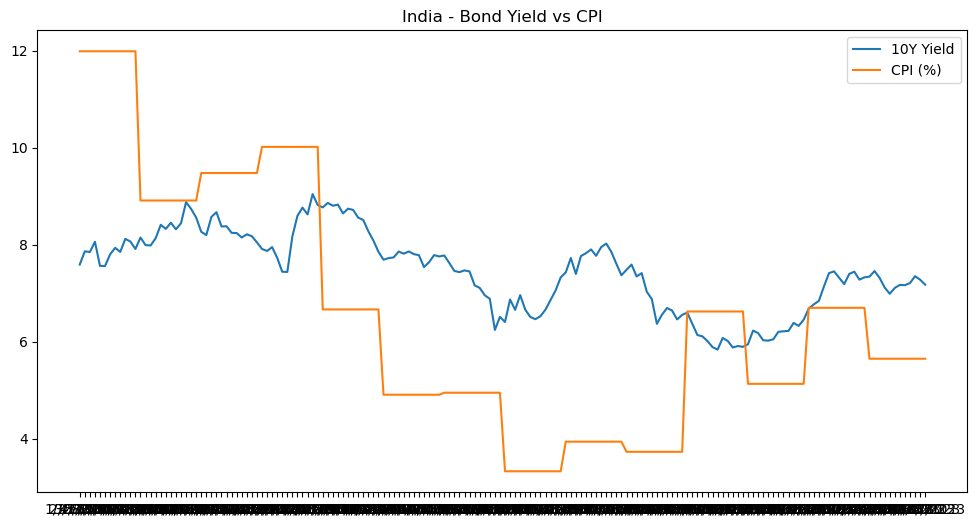

In [20]:
# 4. Time series plots
plt.figure(figsize=(12,6))
plt.plot(india['date'], india['yield_10y'], label="10Y Yield")
plt.plot(india['date'], india['CPI_annual_pct'], label="CPI (%)")
plt.legend()
plt.title("India - Bond Yield vs CPI")
plt.show()

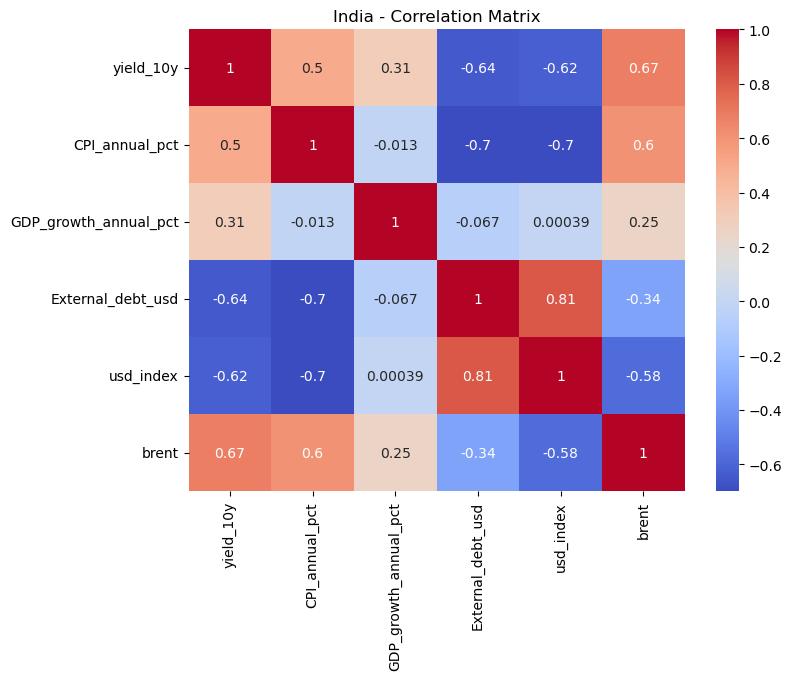

In [21]:
# 5. Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(india[['yield_10y','CPI_annual_pct','GDP_growth_annual_pct',
                   'External_debt_usd','usd_index','brent']].corr(),
            annot=True, cmap="coolwarm")
plt.title("India - Correlation Matrix")
plt.show()

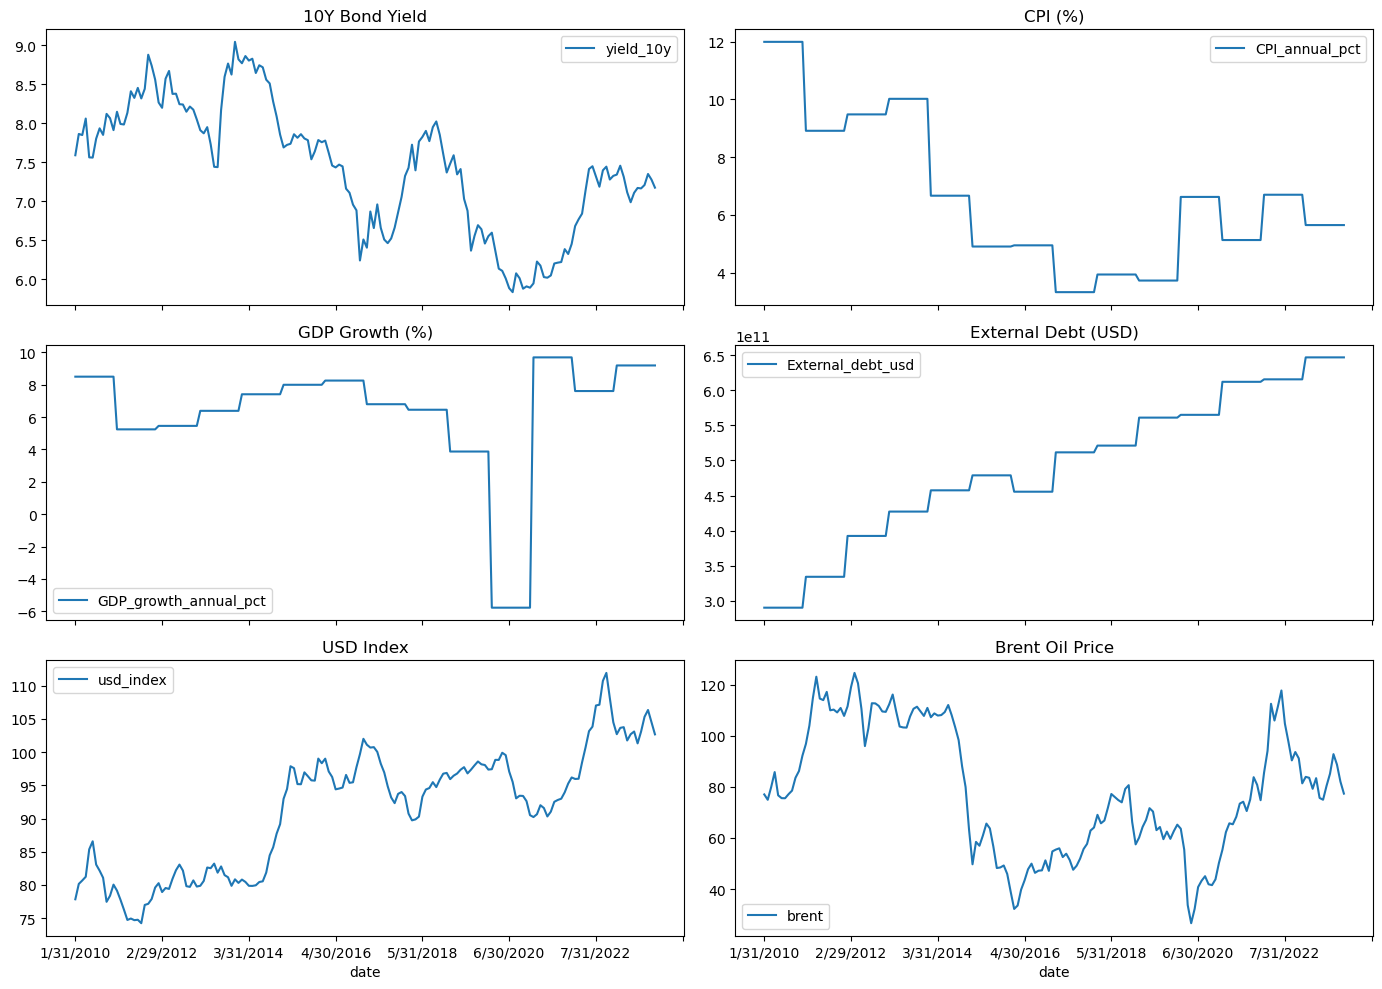

In [22]:
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)

india.plot(x="date", y="yield_10y", ax=axes[0,0], title="10Y Bond Yield")
india.plot(x="date", y="CPI_annual_pct", ax=axes[0,1], title="CPI (%)")
india.plot(x="date", y="GDP_growth_annual_pct", ax=axes[1,0], title="GDP Growth (%)")
india.plot(x="date", y="External_debt_usd", ax=axes[1,1], title="External Debt (USD)")
india.plot(x="date", y="usd_index", ax=axes[2,0], title="USD Index")
india.plot(x="date", y="brent", ax=axes[2,1], title="Brent Oil Price")

plt.tight_layout()
plt.show()

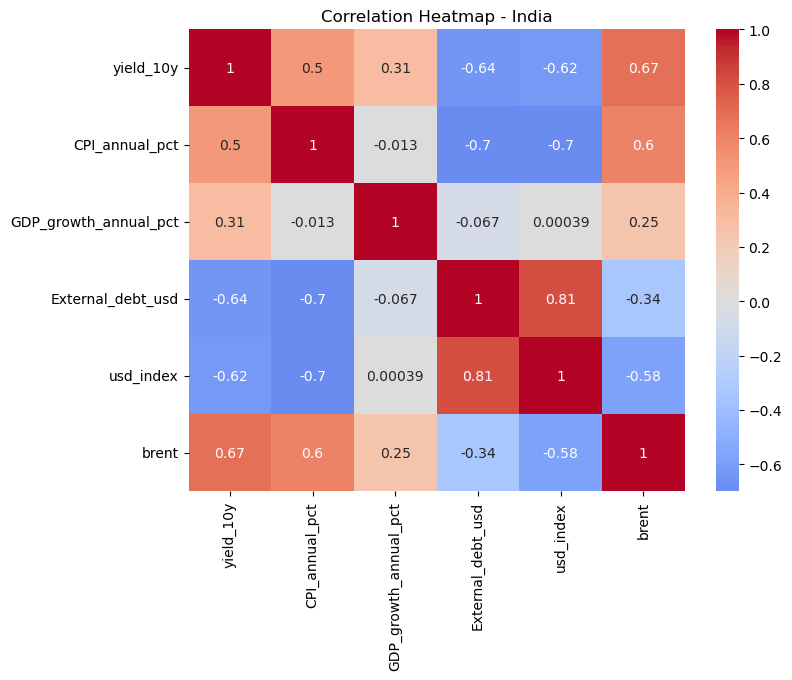

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(india[["yield_10y","CPI_annual_pct","GDP_growth_annual_pct",
                   "External_debt_usd","usd_index","brent"]].corr(),
            annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap - India")
plt.show()


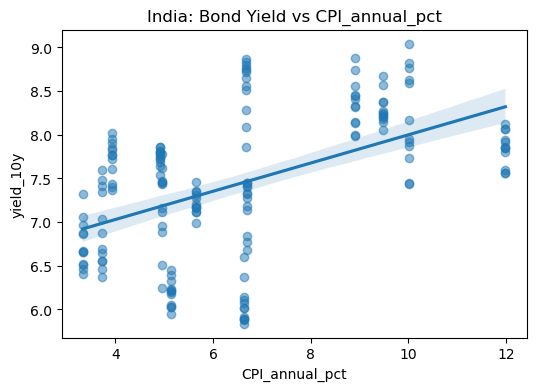

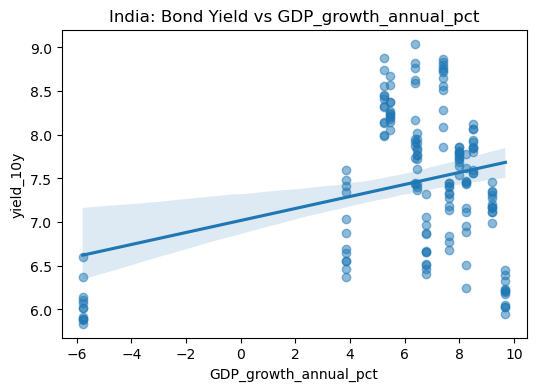

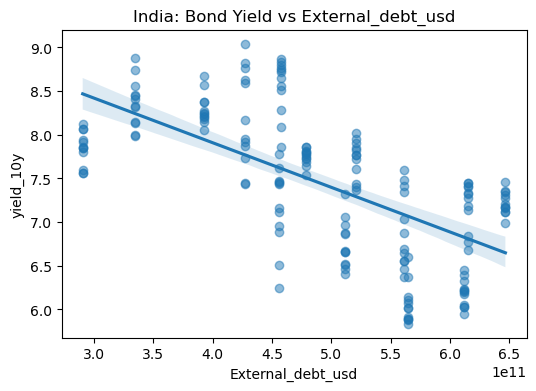

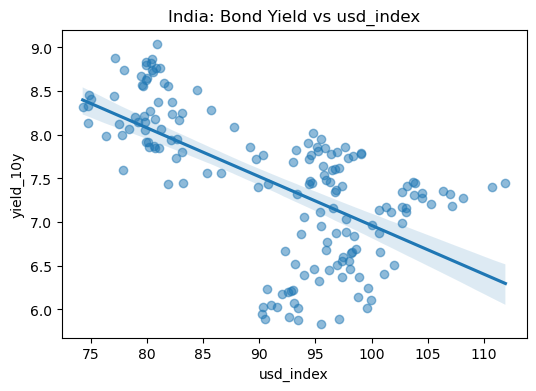

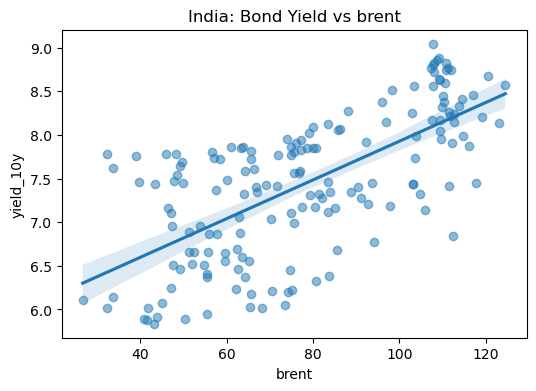

In [24]:
features = ["CPI_annual_pct","GDP_growth_annual_pct","External_debt_usd","usd_index","brent"]

for feat in features:
    plt.figure(figsize=(6,4))
    sns.regplot(x=india[feat], y=india["yield_10y"], scatter_kws={"alpha":0.5})
    plt.title(f"India: Bond Yield vs {feat}")
    plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_412\1965804953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india["rolling_vol"] = india["yield_10y"].rolling(window=12).std()


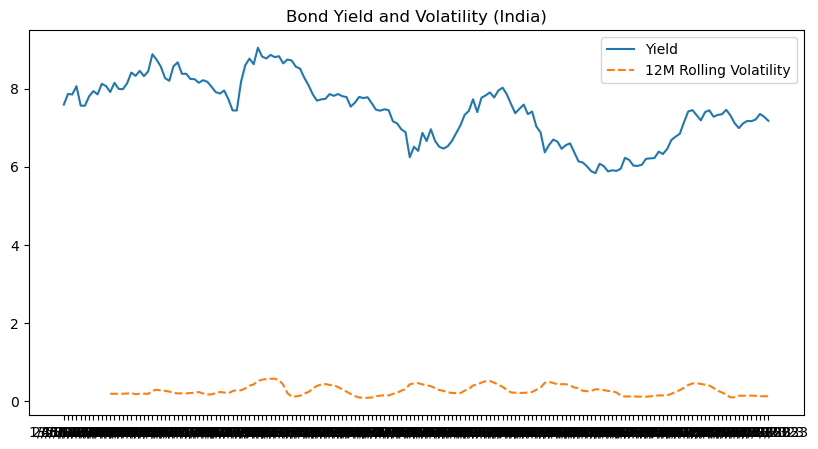

In [25]:
india["rolling_vol"] = india["yield_10y"].rolling(window=12).std()

plt.figure(figsize=(10,5))
plt.plot(india["date"], india["yield_10y"], label="Yield")
plt.plot(india["date"], india["rolling_vol"], label="12M Rolling Volatility", linestyle="--")
plt.legend()
plt.title("Bond Yield and Volatility (India)")
plt.show()